# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#URL called to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"

#Variables
temps = []
unit = "imperial"
coordinates = []
latitude = []
longitude = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Loop through to collect temperature for each city in the cities list
for city in cities:
    #Build query URL and request your results in Fahrenheit
    query_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    #Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        temperature = weather_json["main"]["temp"]
        temps.append(temperature)
        coordinates.append(weather_json["coord"])
        lat = weather_json["coord"]["lat"]
        latitude.append(lat)
        lon = weather_json["coord"]["lon"]
        longitude.append(lon)
        humidity_level = weather_json["main"]["humidity"]
        humidity.append(humidity_level)
        clouds = weather_json["clouds"]["all"]
        cloudiness.append(clouds)
        wind = weather_json["wind"]["speed"]
        wind_speed.append(wind)
        cntry = weather_json["sys"]["country"]
        country.append(cntry)
        date.append(weather_json["dt"])
        #https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/
        print(f"City {cities.index(city)}: the temperature in {city} is {round(temperature)}" + " degrees Fahrenheit")
    except:
        coordinates.append(0)
        temps.append(0)
        humidity.append(0)
        cloudiness.append(0)
        wind_speed.append(0)
        latitude.append(0)
        longitude.append(0)
        country.append(0)
        date.append(0)
        print(f"{city} not found. Skipping...")

City 0: the temperature in tuktoyaktuk is 61 degrees Fahrenheit
City 1: the temperature in port moresby is 72 degrees Fahrenheit
City 2: the temperature in castro is 62 degrees Fahrenheit
City 3: the temperature in bodden town is 80 degrees Fahrenheit
City 4: the temperature in marolambo is 62 degrees Fahrenheit
City 5: the temperature in kaitangata is 47 degrees Fahrenheit
City 6: the temperature in adrar is 103 degrees Fahrenheit
City 7: the temperature in hamilton is 87 degrees Fahrenheit
City 8: the temperature in arraial do cabo is 66 degrees Fahrenheit
City 9: the temperature in busselton is 48 degrees Fahrenheit
City 10: the temperature in port alfred is 61 degrees Fahrenheit
City 11: the temperature in thompson is 50 degrees Fahrenheit
City 12: the temperature in dragoesti is 64 degrees Fahrenheit
City 13: the temperature in kargasok is 48 degrees Fahrenheit
City 14: the temperature in laguna is 84 degrees Fahrenheit
City 15: the temperature in cayenne is 90 degrees Fahrenheit


City 135: the temperature in port macquarie is 37 degrees Fahrenheit
sentyabrskiy not found. Skipping...
yian not found. Skipping...
City 138: the temperature in tezu is 78 degrees Fahrenheit
nizhneyansk not found. Skipping...
City 140: the temperature in ponta do sol is 74 degrees Fahrenheit
City 141: the temperature in stornoway is 55 degrees Fahrenheit
City 142: the temperature in sao miguel do araguaia is 91 degrees Fahrenheit
lhuntshi not found. Skipping...
City 144: the temperature in kahului is 78 degrees Fahrenheit
City 145: the temperature in cabinda is 74 degrees Fahrenheit
City 146: the temperature in sergeyevka is 52 degrees Fahrenheit
nam tha not found. Skipping...
City 148: the temperature in port lincoln is 50 degrees Fahrenheit
City 149: the temperature in padang is 78 degrees Fahrenheit
City 150: the temperature in avarua is 73 degrees Fahrenheit
City 151: the temperature in mandalgovi is 58 degrees Fahrenheit
City 152: the temperature in kupang is 72 degrees Fahrenhei

City 273: the temperature in espanola is 84 degrees Fahrenheit
City 274: the temperature in chuy is 66 degrees Fahrenheit
City 275: the temperature in bacalar is 90 degrees Fahrenheit
City 276: the temperature in huoqiu is 75 degrees Fahrenheit
City 277: the temperature in opuwo is 66 degrees Fahrenheit
City 278: the temperature in mizdah is 77 degrees Fahrenheit
City 279: the temperature in malinovoye ozero is 63 degrees Fahrenheit
City 280: the temperature in khuzdar is 81 degrees Fahrenheit
City 281: the temperature in severo-kurilsk is 50 degrees Fahrenheit
City 282: the temperature in tuy hoa is 80 degrees Fahrenheit
City 283: the temperature in tabatinga is 74 degrees Fahrenheit
City 284: the temperature in serro is 66 degrees Fahrenheit
City 285: the temperature in ilukste is 58 degrees Fahrenheit
City 286: the temperature in avera is 82 degrees Fahrenheit
City 287: the temperature in byron bay is 42 degrees Fahrenheit
City 288: the temperature in noumea is 67 degrees Fahrenheit

City 409: the temperature in fortuna is 59 degrees Fahrenheit
City 410: the temperature in taoudenni is 104 degrees Fahrenheit
City 411: the temperature in ewa beach is 81 degrees Fahrenheit
City 412: the temperature in puerto escondido is 77 degrees Fahrenheit
City 413: the temperature in faqirwali is 92 degrees Fahrenheit
City 414: the temperature in berlevag is 52 degrees Fahrenheit
mahadday weyne not found. Skipping...
City 416: the temperature in karratha is 76 degrees Fahrenheit
City 417: the temperature in sudak is 69 degrees Fahrenheit
City 418: the temperature in nsanje is 79 degrees Fahrenheit
City 419: the temperature in geraldton is 46 degrees Fahrenheit
City 420: the temperature in ulaangom is 57 degrees Fahrenheit
City 421: the temperature in vung tau is 82 degrees Fahrenheit
City 422: the temperature in lorengau is 80 degrees Fahrenheit
City 423: the temperature in west wendover is 91 degrees Fahrenheit
City 424: the temperature in san andres is 84 degrees Fahrenheit
Cit

City 544: the temperature in biharamulo is 66 degrees Fahrenheit
City 545: the temperature in mwinilunga is 63 degrees Fahrenheit
City 546: the temperature in jijiga is 65 degrees Fahrenheit
City 547: the temperature in najran is 93 degrees Fahrenheit
City 548: the temperature in fairbanks is 54 degrees Fahrenheit
City 549: the temperature in bulgan is 51 degrees Fahrenheit
City 550: the temperature in baracoa is 87 degrees Fahrenheit
City 551: the temperature in sulangan is 84 degrees Fahrenheit
City 552: the temperature in sencha is 69 degrees Fahrenheit
City 553: the temperature in purpe is 53 degrees Fahrenheit
City 554: the temperature in yichun is 62 degrees Fahrenheit
City 555: the temperature in andenes is 52 degrees Fahrenheit
City 556: the temperature in puerto madryn is 56 degrees Fahrenheit
saleaula not found. Skipping...
City 558: the temperature in cabedelo is 82 degrees Fahrenheit
City 559: the temperature in mpika is 65 degrees Fahrenheit
City 560: the temperature in lu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe
weather_dict = { 
    "City": cities,
    "Coordinates": coordinates,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temps,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}

weather_data = pd.DataFrame(weather_dict)
cleaned_weather_data = weather_data.loc[weather_data["Temperature"] > 0 , :]
cleaned_weather_data = cleaned_weather_data.reset_index(drop=True)
# https://stackoverflow.com/questions/62887543/remove-curly-brace-in-field
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].astype('str')
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].str.strip("{'lon': ")
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].str.strip("}")
# https://www.programiz.com/python-programming/methods/string/replace
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].str.replace("'lat':", " ")

In [5]:
#Write to .csv
cleaned_weather_data.to_csv('city_weather.csv')

In [6]:
cleaned_weather_data.head(5)

,City,Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,"-133.04, 69.45",69.45,-133.04,60.80,82,20,11.41,CA,1598294818
1,port moresby,"147.18, -9.44",-9.44,147.18,71.60,100,40,9.17,PG,1598294819
2,castro,"-50.01, -24.79",-24.79,-50.01,62.40,67,0,7.78,BR,1598294769
3,bodden town,"-81.25, 19.28",19.28,-81.25,79.63,94,90,9.17,KY,1598294819
4,marolambo,"48.12, -20.05",-20.05,48.12,62.02,92,63,1.12,MG,1598294819


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_over_a_hundred = cleaned_weather_data.loc[cleaned_weather_data["Humidity"] > 100 , :]
humidity_over_a_hundred.head(5)

,City,Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
#SKIPPING AS NO CITY HAS OVER 100% HUMIDITY

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#SKIPPING AS NO CITY HAS OVER 100% HUMIDITY

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

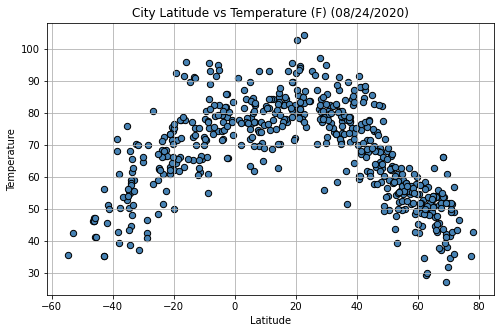

In [10]:
x_lat = cleaned_weather_data["Latitude"]
y_temp = cleaned_weather_data["Temperature"]
# https://stackoverflow.com/questions/21738566/how-to-set-a-variable-to-be-todays-date-in-python-pandas
date = pd.Timestamp('today').strftime("%m/%d/%Y")

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html?highlight=marker%20size
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Temperature", title = "City Latitude vs Temperature (F) " + 
                          "(" + date + ")", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.savefig("Images/lat_vs_temp.png")
plt.show()


## Latitude vs. Humidity Plot

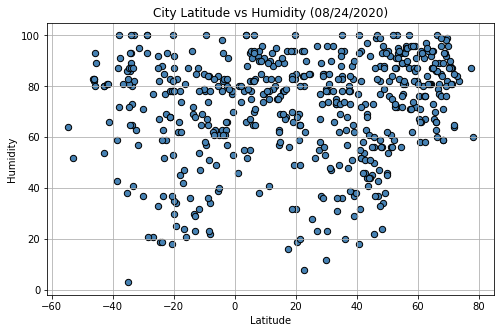

In [11]:
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "City Latitude vs Humidity " + 
                          "(" + date + ")", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.savefig("Images/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

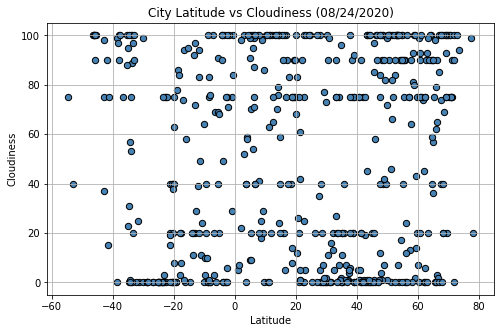

In [12]:
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "City Latitude vs Cloudiness " + 
                          "(" + date + ")", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

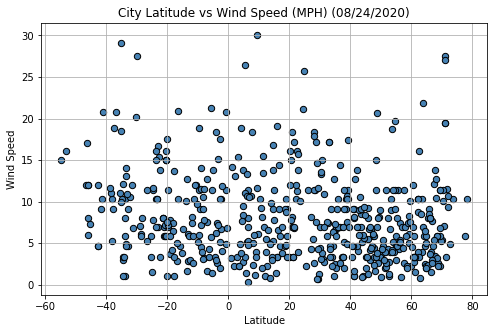

In [13]:
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Wind Speed", title = "City Latitude vs Wind Speed (MPH) " + 
                          "(" + date + ")", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.savefig("Images/lat_vs_windspeed.png")
plt.show()

## Linear Regression

In [14]:
#Northern hemisphere variables
northern_hemisphere = cleaned_weather_data.loc[cleaned_weather_data["Latitude"] >= 0 , :]
northern_hem_lat = northern_hemisphere["Latitude"]
northern_temp = northern_hemisphere["Temperature"]

#Southern hemisphere variables
southern_hemisphere = cleaned_weather_data.loc[cleaned_weather_data["Latitude"] < 0 , :]
southern_hem_lat = southern_hemisphere["Latitude"]
southern_temp = southern_hemisphere["Temperature"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.78


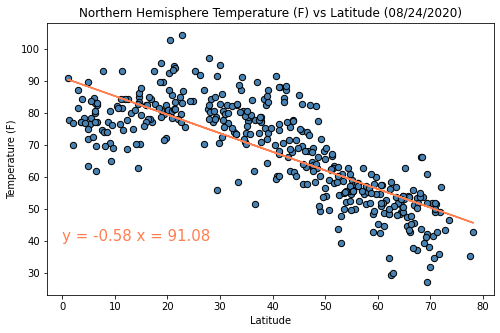

In [15]:
#Get pearson r value AKA correlation number
northern_rvalue = st.pearsonr(northern_hem_lat, northern_temp)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_temp)

northern_fit = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_temp, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit, color = "coral")
plt.annotate(line_eq, (0, 40), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere Temperature (F) vs Latitude " + "(" + date + ")")
print(f"The r-value is {northern_rvalue[0]:.2}")
plt.savefig("Images/northern_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.76


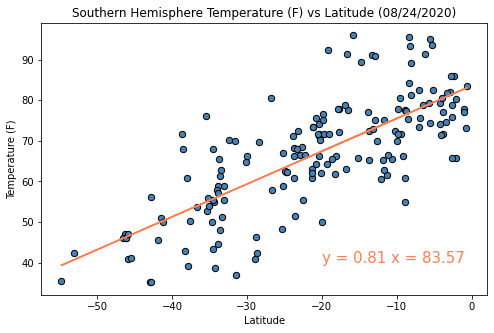

In [16]:
#Get pearson r value AKA correlation number
southern_rvalue = st.pearsonr(southern_hem_lat, southern_temp)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_temp)

southern_fit = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_temp, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit, color = "coral")
plt.annotate(line_eq, (-20, 40), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere Temperature (F) vs Latitude " + "(" + date + ")")
print(f"The r-value is {southern_rvalue[0]:.2}")
plt.savefig("Images/southern_lat_vs_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.13


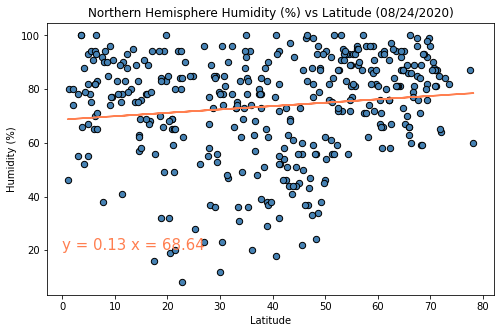

In [17]:
northern_humidity = northern_hemisphere["Humidity"]

#Get pearson r value AKA correlation number
northern_hum_rvalue = st.pearsonr(northern_hem_lat, northern_humidity)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_humidity)

northern_fit_hum = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_humidity, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit_hum, color = "coral")
plt.annotate(line_eq, (0, 20), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity (%) vs Latitude " + "(" + date + ")")
print(f"The r-value is {northern_hum_rvalue[0]:.2}")
plt.savefig("Images/northern_lat_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.15


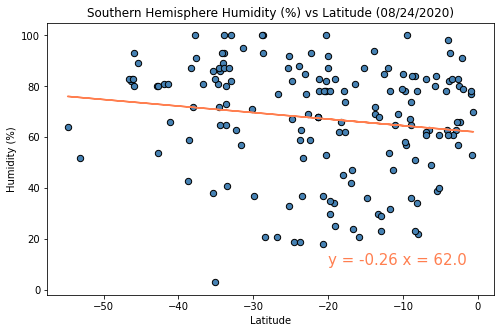

In [18]:
southern_humidity = southern_hemisphere["Humidity"]

#Get pearson r value AKA correlation number
southern_hum_rvalue = st.pearsonr(southern_hem_lat, southern_humidity)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_humidity)

southern_fit_hum = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_humidity, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit_hum, color = "coral")
plt.annotate(line_eq, (-20, 10), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity (%) vs Latitude " + "(" + date + ")")
print(f"The r-value is {southern_hum_rvalue[0]:.2}")
plt.savefig("Images/southern_lat_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.082


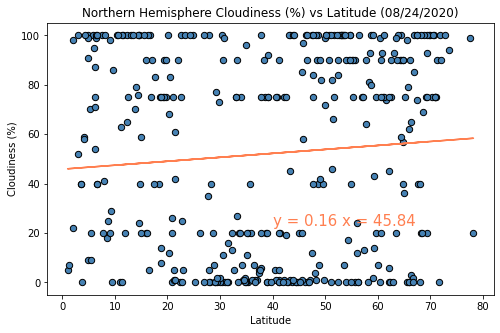

In [25]:
northern_cloudiness = northern_hemisphere["Cloudiness"]

#Get pearson r value AKA correlation number
northern_cloud_rvalue = st.pearsonr(northern_hem_lat, northern_cloudiness)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_cloudiness)

northern_fit_cloud = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_cloudiness, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit_cloud, color = "coral")
plt.annotate(line_eq, (40, 23), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness (%) vs Latitude " + "(" + date + ")")
print(f"The r-value is {northern_cloud_rvalue[0]:.2}")
plt.savefig("Images/northern_lat_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.16


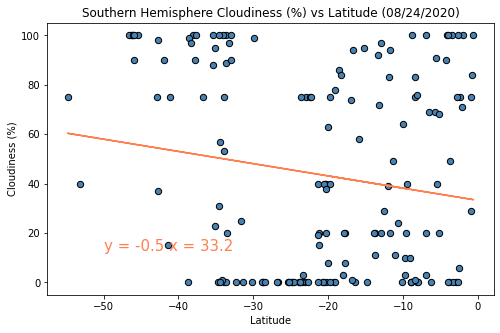

In [21]:
southern_cloudiness = southern_hemisphere["Cloudiness"]

#Get pearson r value AKA correlation number
southern_cloud_rvalue = st.pearsonr(southern_hem_lat, southern_cloudiness)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_cloudiness)

southern_fit_cloud = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_cloudiness, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit_cloud, color = "coral")
plt.annotate(line_eq, (-50, 13), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness (%) vs Latitude " + "(" + date + ")")
print(f"The r-value is {southern_cloud_rvalue[0]:.2}")
plt.savefig("Images/southern_lat_vs_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1


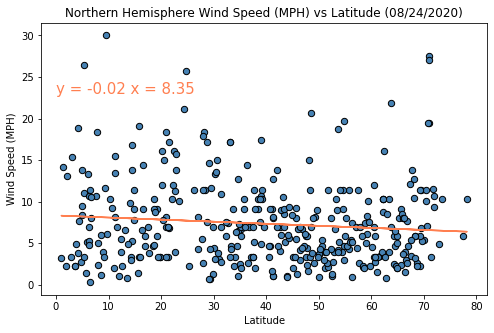

In [24]:
northern_wind = northern_hemisphere["Wind Speed"]

#Get pearson r value AKA correlation number
northern_wind_rvalue = st.pearsonr(northern_hem_lat, northern_wind)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_wind)

northern_fit_wind = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_wind, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit_wind, color = "coral")
plt.annotate(line_eq, (0, 23), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Northern Hemisphere Wind Speed (MPH) vs Latitude " + "(" + date + ")")
print(f"The r-value is {northern_wind_rvalue[0]:.2}")
plt.savefig("Images/northern_lat_vs_windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.18


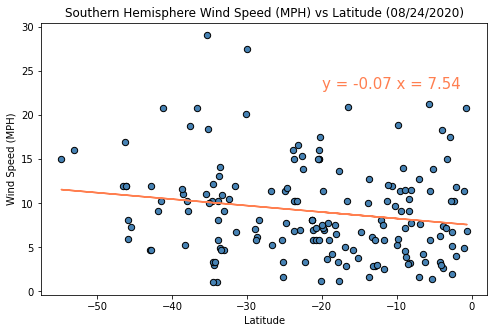

In [26]:
southern_wind = southern_hemisphere["Wind Speed"]

#Get pearson r value AKA correlation number
southern_wind_rvalue = st.pearsonr(southern_hem_lat, southern_wind)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_wind)

southern_fit_wind = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_wind, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit_wind, color = "coral")
plt.annotate(line_eq, (-20, 23), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Southern Hemisphere Wind Speed (MPH) vs Latitude " + "(" + date + ")")
print(f"The r-value is {southern_wind_rvalue[0]:.2}")
plt.savefig("Images/southern_lat_vs_windspeed.png")
plt.show()